# Deep Learning and Image Processing

We create algorithms to read and write numbers, stored in matrices.

<img src="https://github.com/tkorting/remote-sensing-images/raw/master/algorithms-to-read-write-rasters.png" width=800>

We can use several programming languages and libraries to load imagery information and retrieve those matrices.

In Python:
* opencv (https://opencv.org/)
* rasterio (https://rasterio.readthedocs.io/)
* GDAL (https://gdal.org/)
* ...

## Importing requirements

In [2]:
import os
import cv2
import rasterio
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal

## Download Data

This repository contains some crops of remote sensing images, that we can download (using wget every time we start this colab) and use in our exercises.

In [7]:
raster = "heliponto_2.tif"
path = "./data/"
raster_filename = path + raster
if not os.path.exists(path):
    os.mkdir(path)
!wget https://github.com/tkorting/remote-sensing-images/raw/master/{raster}
!mv {raster} {path}

--2021-10-01 21:12:04--  https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_2.tif
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif [following]
--2021-10-01 21:12:04--  https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122951 (120K) [image/tiff]
Saving to: ‘heliponto_2.tif’

heliponto_2.tif     100%[===================>] 120,07K  --.-KB/s    in 0,02s   

2021-10-01 21:12:04 (6,55 MB/s) - ‘heliponto_2.tif’ saved [122951/122951]



## Loading images

In [8]:
opencv_matrix = cv2.imread(raster_filename, cv2.IMREAD_GRAYSCALE)
rasterio_matrix = rasterio.open(raster_filename).read(1)
gdal_raster = gdal.Open(raster_filename, gdal.GA_ReadOnly)
gdal_band = gdal_raster.GetRasterBand(1)
gdal_matrix = gdal_band.ReadAsArray()

## Display images

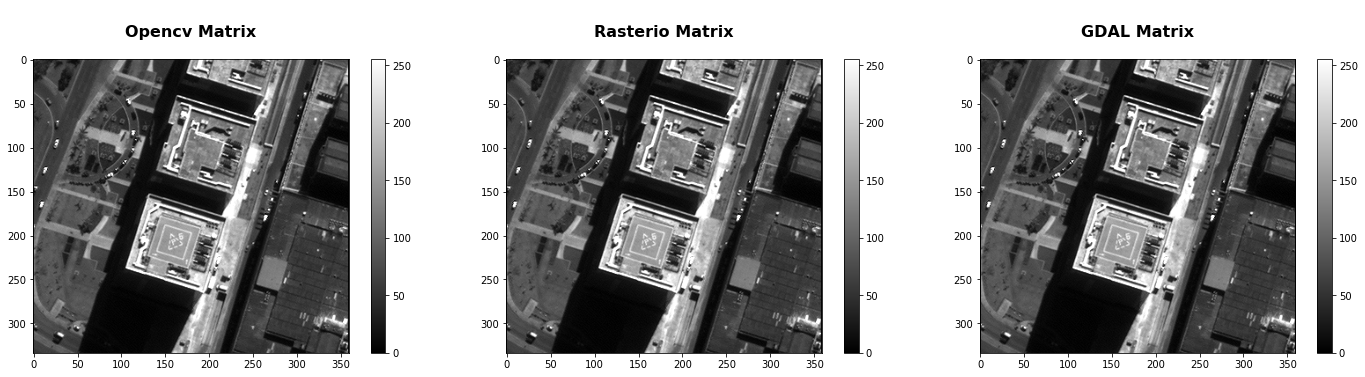

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

img = axs[0].imshow(opencv_matrix, cmap="gray")
axs[0].set_title('\nOpencv Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(rasterio_matrix, cmap="gray")
axs[1].set_title('\nRasterio Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[1])

img = axs[2].imshow(gdal_matrix, cmap="gray")
axs[2].set_title('\nGDAL Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[2])

fig.tight_layout()
plt.show()

## Exercise 1

Create a convolution kernel called `average_kernel` as a `numpy array` with the following parameters:
* width: 15
* height: 15
* weights: all values equal to 1 / (15 * 15) or `~0.00444`

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) and output (`conv_matrix`) images.

In [23]:
matrix = rasterio_matrix

h, w = 15, 15
avg_kernel = np.ones((h * w)) / (h * w)

output = []
for line in range(0, matrix.shape[0] - h):
    y = []
    for column in range(0, matrix.shape[1] - w):
        dot = np.dot(matrix[line:line + h, column:column + w].ravel(), avg_kernel)
        y.append(dot)
    output.append(y)

### Display the output matrix

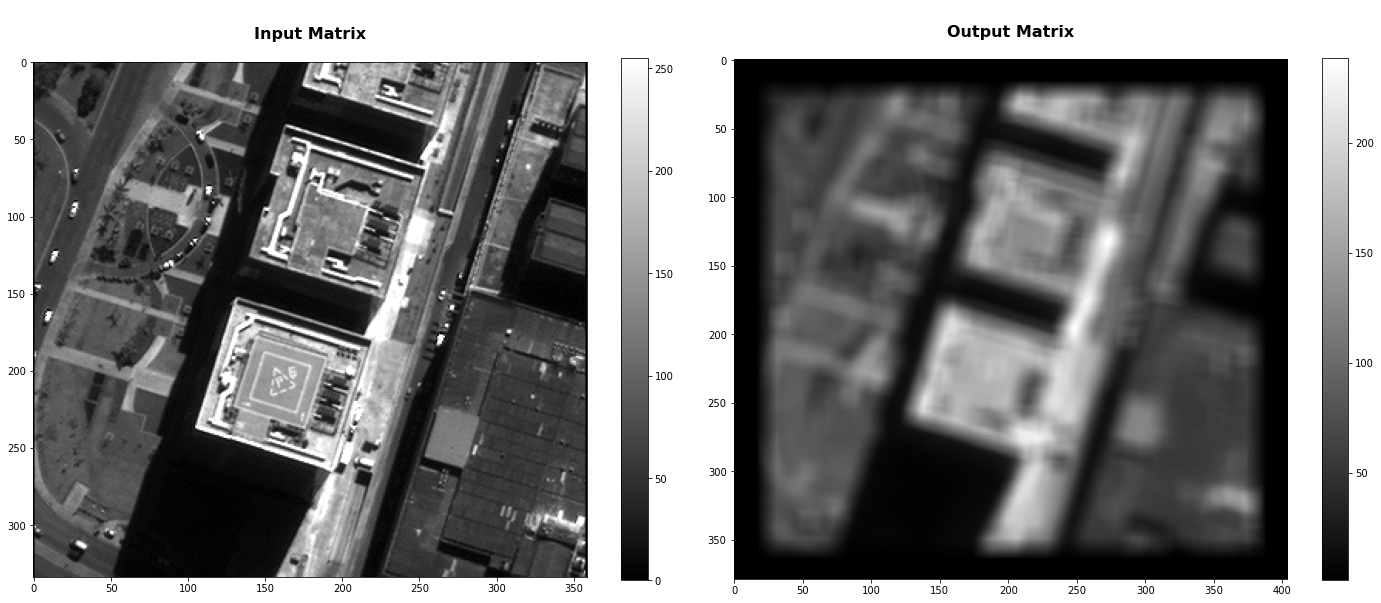

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

img = axs[0].imshow(matrix, cmap="gray")
axs[0].set_title('\nInput Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(output, cmap="gray")
axs[1].set_title('\nOutput Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[1])

fig.tight_layout()
plt.show()

### No-Padding effect

Notice the artificial border produced in the output `conv_matrix`. This effect is because the algorithm can't find all neighbors to process line 0 column 0, for example.

<img src="https://github.com/tkorting/remote-sensing-images/raw/master/need_for_padding.jpg">

To reduce this effect, we can use *padding*, by adding in the input image enough rows/columns in the borders.

From **Exercise 1**, implement padding and display, using `matplotlib`, the input (`rio_matrix`) with padding, and output (`conv_matrix_padding`) images.

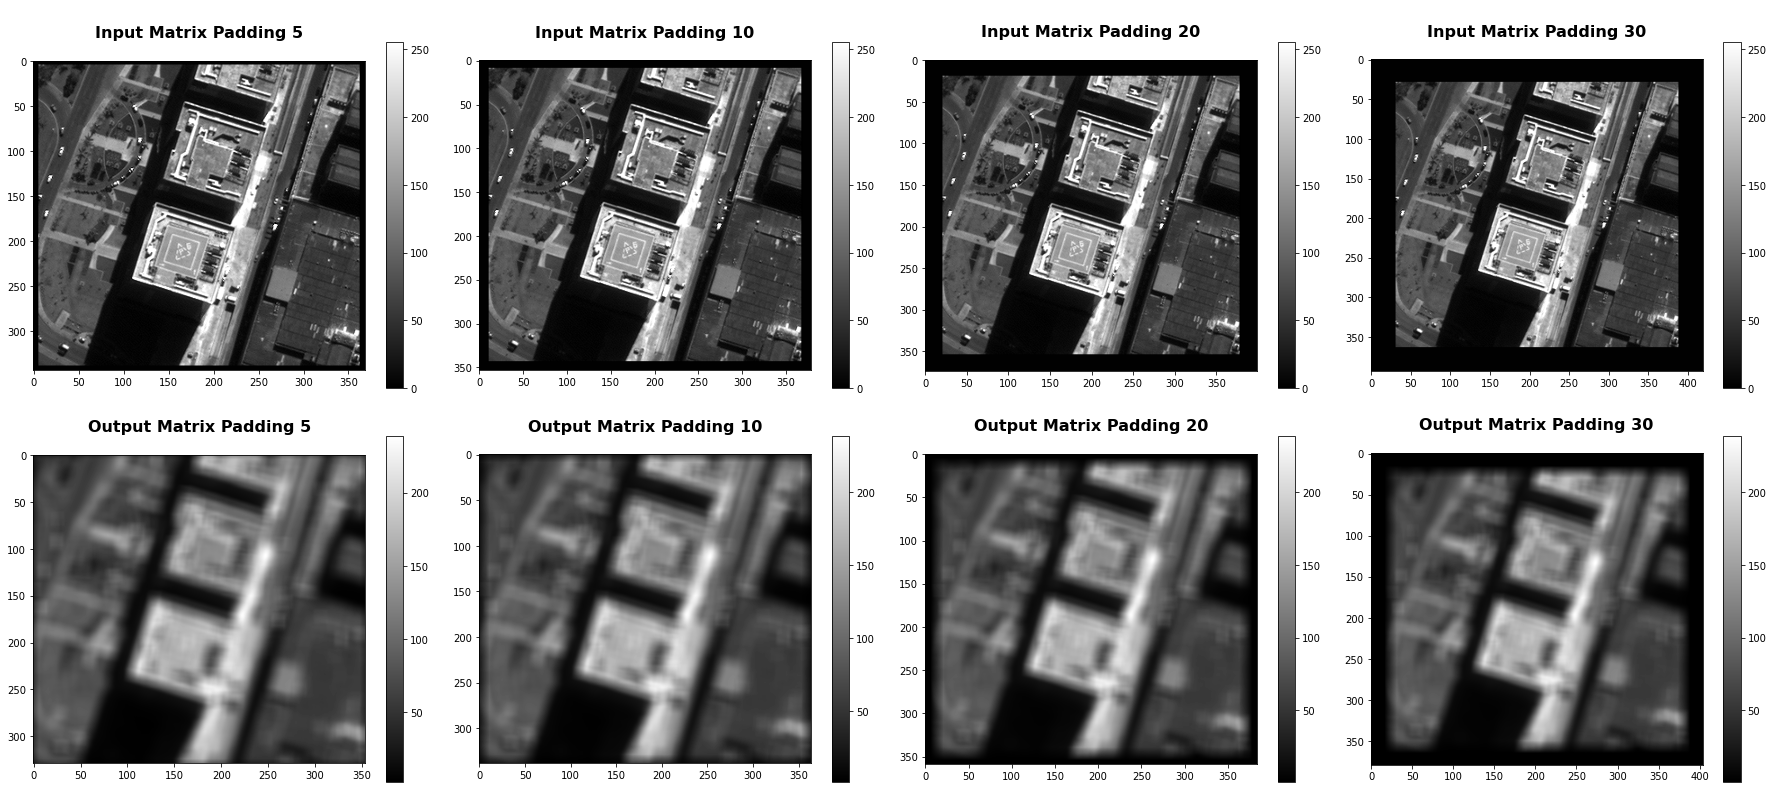

In [39]:
matrix = rasterio_matrix
padding_values = [5, 10, 20, 30]

fig, axs = plt.subplots(2, len(padding_values), figsize=(25, 11))

for i in range(len(padding_values)):
    padding = padding_values[i]
    _matrix = np.ones((matrix.shape[0] + (padding * 2), matrix.shape[1] + (padding * 2)))
    _matrix[padding:-padding, padding:-padding] = matrix.copy()

    h, w = 15, 15
    avg_kernel = np.ones((h * w)) / (h * w)

    output = []
    for line in range(0, _matrix.shape[0] - h):
        y = []
        for column in range(0, _matrix.shape[1] - w):
            dot = np.dot(_matrix[line:line + h, column:column + w].ravel(), avg_kernel)
            y.append(dot)
        output.append(y)

    img = axs[0][i].imshow(_matrix, cmap="gray")
    axs[0][i].set_title(f'\nInput Matrix Padding {padding}\n', fontdict={'size': 16, 'weight': 'bold'})
    fig.colorbar(img, ax=axs[0][i])

    img = axs[1][i].imshow(output, cmap="gray")
    axs[1][i].set_title(f'\nOutput Matrix Padding {padding}\n', fontdict={'size': 16, 'weight': 'bold'})
    fig.colorbar(img, ax=axs[1][i])

fig.tight_layout()
plt.show()

## Exercise 2

Using the same convolution kernel defined in the previous exercise, apply it to `raster_filename` using a stride of 5.

Display, using `matplotlib` input (`rio_matrix`) and output (`conv_matrix_stride`) images.


### The stride effect

The distance between two successive windows is a parameter of the convolution, called its **stride**, which is commonly 1. However, it is possible to have strided convolutions, by using a stride higher than 1.

<img src="https://github.com/tkorting/remote-sensing-images/raw/master/idea_of_striding.jpg">

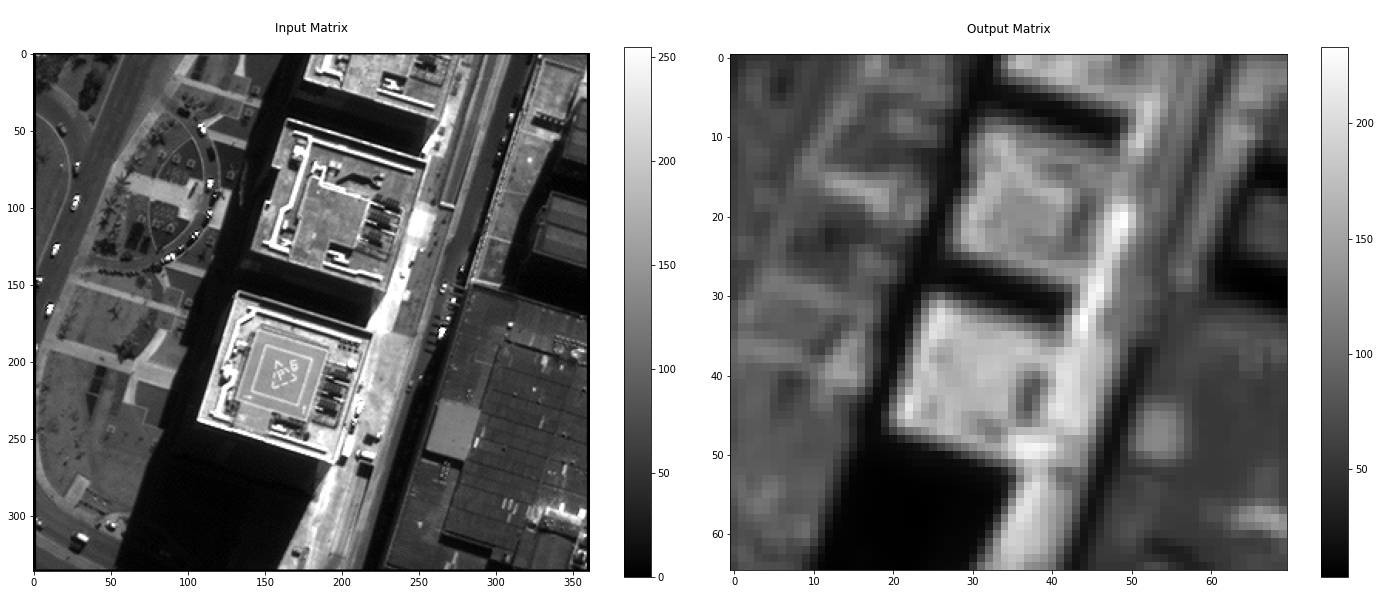

In [44]:
matrix = rasterio_matrix
padding = 1
stride = 5


matrix = np.ones((matrix.shape[0] + (padding * 2), matrix.shape[1] + (padding * 2)))
matrix[padding:-padding, padding:-padding] = rasterio_matrix.copy()

h, w = 15, 15
avg_kernel = np.ones((h * w)) / (h * w)

output = []
for line in range(0, matrix.shape[0] - h, stride):
    y = []
    for column in range(0, matrix.shape[1] - w, stride):
        dot = np.dot(matrix[line:line + h, column:column + w].ravel(), avg_kernel)
        y.append(dot)
    output.append(y)
    
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

img = axs[0].imshow(matrix, cmap="gray")
axs[0].set_title('\nInput Matrix\n')
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(output, cmap="gray")
axs[1].set_title('\nOutput Matrix\n')
fig.colorbar(img, ax=axs[1])

fig.tight_layout()
plt.show()

### Display with multiple strides

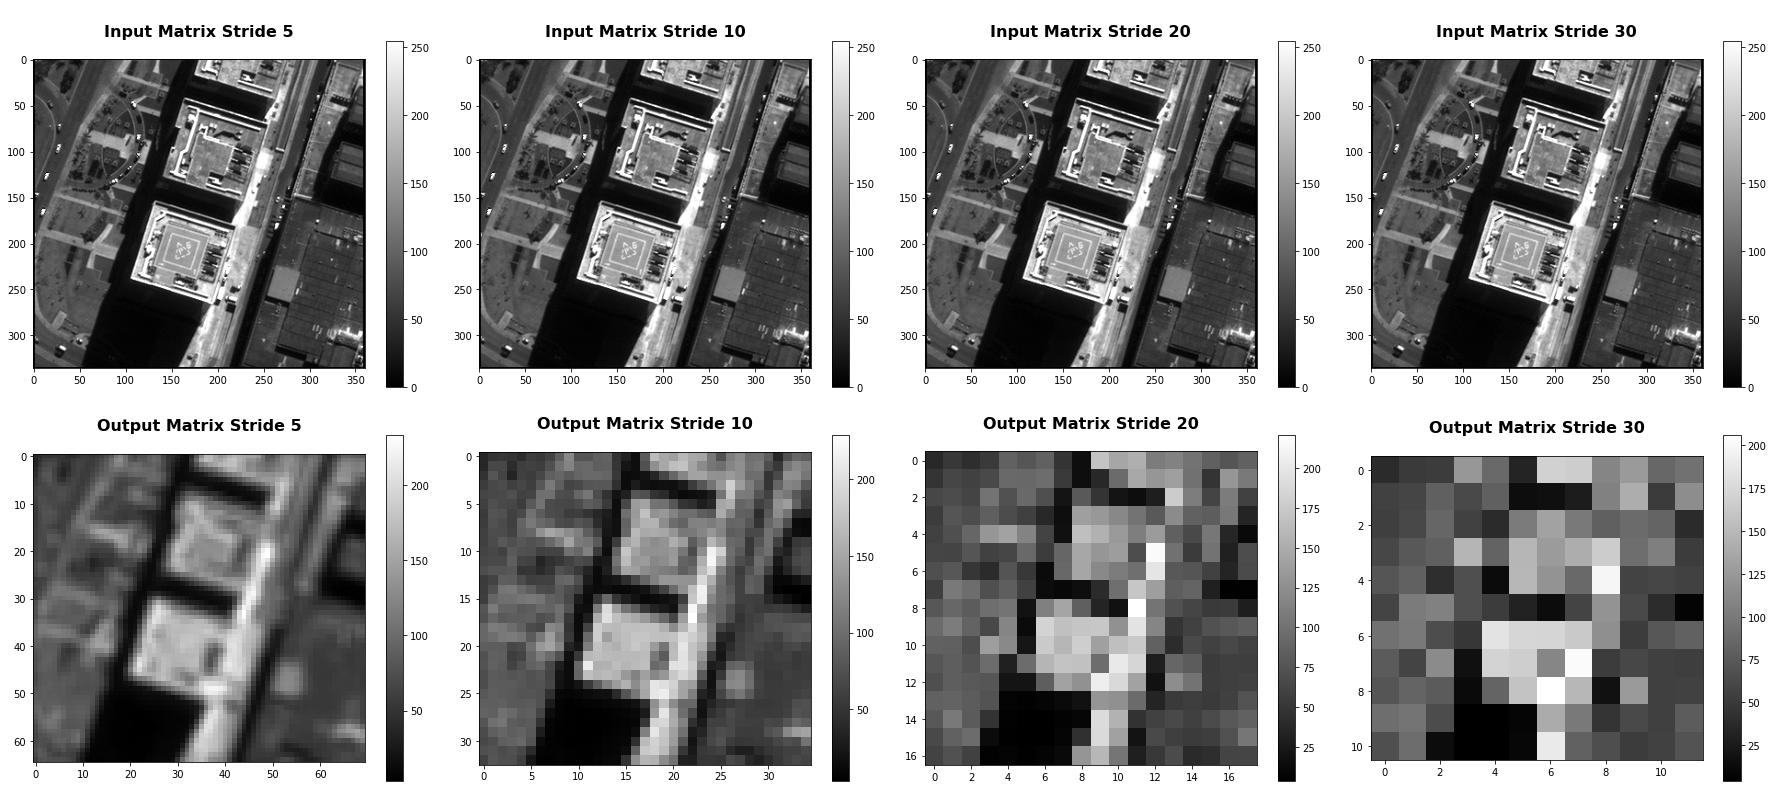

In [45]:
matrix = rasterio_matrix
padding = 1
stride_values = [5, 10, 20, 30]

fig, axs = plt.subplots(2, len(padding_values), figsize=(25, 11))

for i in range(len(stride_values)):
    stride = stride_values[i]
    _matrix = np.ones((matrix.shape[0] + (padding * 2), matrix.shape[1] + (padding * 2)))
    _matrix[padding:-padding, padding:-padding] = matrix.copy()

    h, w = 15, 15
    avg_kernel = np.ones((h * w)) / (h * w)

    output = []
    for line in range(0, _matrix.shape[0] - h, stride):
        y = []
        for column in range(0, _matrix.shape[1] - w, stride):
            dot = np.dot(_matrix[line:line + h, column:column + w].ravel(), avg_kernel)
            y.append(dot)
        output.append(y)

    img = axs[0][i].imshow(_matrix, cmap="gray")
    axs[0][i].set_title(f'\nInput Matrix Stride {stride}\n', fontdict={'size': 16, 'weight': 'bold'})
    fig.colorbar(img, ax=axs[0][i])

    img = axs[1][i].imshow(output, cmap="gray")
    axs[1][i].set_title(f'\nOutput Matrix Stride {stride}\n', fontdict={'size': 16, 'weight': 'bold'})
    fig.colorbar(img, ax=axs[1][i])

fig.tight_layout()
plt.show()

## Exercise 3

Create a convolution kernel called `high_pass_kernel` as a `numpy array` with the following weights:

```
-1 -1 -1 -1 -1
 2  2  2 -1 -1
-1  2  2  2 -1
-1 -1 -1  2  2
-1 -1 -1 -1 -1
```

Then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) image, the output (`conv_matrix`) image, and the kernel.

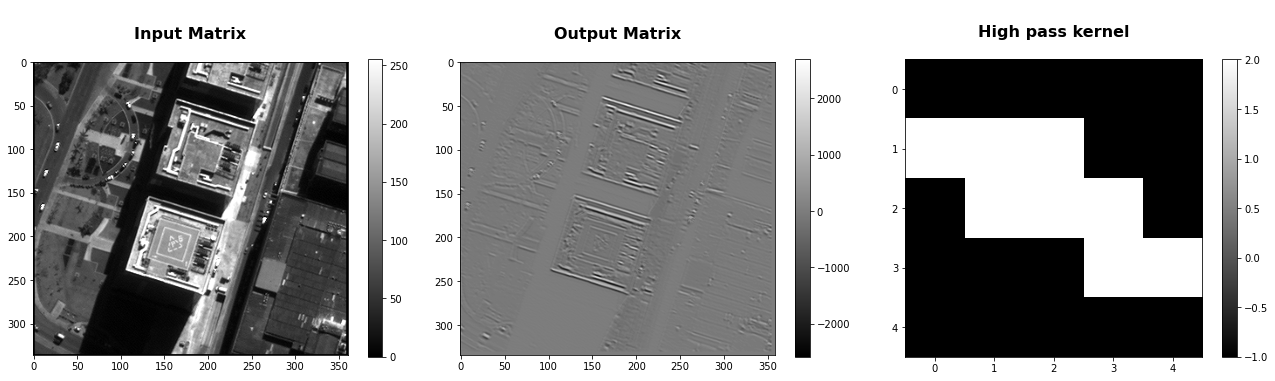

In [78]:
def convolve(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    
    xImageShape = image.shape[0]
    yImageShape = image.shape[1]
    
    output = np.zeros((xImageShape, yImageShape))
    
    # Padding
    imagePadded = np.ones((xImageShape + (padding * 2), yImageShape + (padding * 2)))
    imagePadded[padding:-padding, padding:-padding] = image.copy()

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return imagePadded, output

matrix = rasterio_matrix
kernel = np.array([
    [-1, -1, -1, -1, -1],
    [2, 2, 2, -1, -1], 
    [-1, 2, 2, 2, -1], 
    [-1, -1, -1, 2, 2], 
    [-1, -1, -1, -1, -1]
])
result = convolve(matrix, kernel, padding = 1)

input_ = result[0]
output_ = result[1]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

img = axs[0].imshow(input_, cmap="gray")
axs[0].set_title('\nInput Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(output_, cmap="gray")
axs[1].set_title('\nOutput Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[1])

img = axs[2].imshow(kernel, cmap="gray")
axs[2].set_title('\nHigh pass kernel\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[2])

fig.tight_layout()
plt.show()

# Exercise 4

Apply a $3 \times 3$ kernel filled with 1's, with two different operations: the first with dilation, and the second with erosion.

Display, using `matplotlib` input (`rio_matrix`) and output (`dilation_matrix` and `erosion_matrix`) images.

### Morphological image processing

*Some information is based on [gonzalez1996].*

Mathematical morphology is used in Digital Image Processing as a tool for extracting image components that are useful in the representation and description of region shape, like boundaries.

Morphology basically uses the sets theory and logic operations. However, the primitive operations fo morphological processing are called *dilation* and *erosion*.

Those operations are based on a kernel, also known as *structuring element*, indicating which pixels will be considered (when kernel = 1) and which will not be considered (kernel = 0) in the original image.

Examples:

```
0 1 0
1 1 1
0 1 0

1 1 1
0 0 0
0 0 0
```

#### Dilation

$(f \oplus b)(s,t)=\max\{f(s - x, t - y) + b(x, y) | (s - x), (t - y) \in D_f; (x, y) \in D_b\}$

where $D_f$ and $D_b$ are the domains of $f$ and $b$.

Since the $\max$ operation is applied, when all the values of the structuring element are positive, the output image will be brighter.

#### Erosion

$(f \ominus b)(s,t)=\min\{f(s + x, t + y) - b(x, y) | (s + x), (t + y) \in D_f; (x, y) \in D_b\}$

where $D_f$ and $D_b$ are the domains of $f$ and $b$.

Since the $\min$ operation is applied, the output image will be darker.

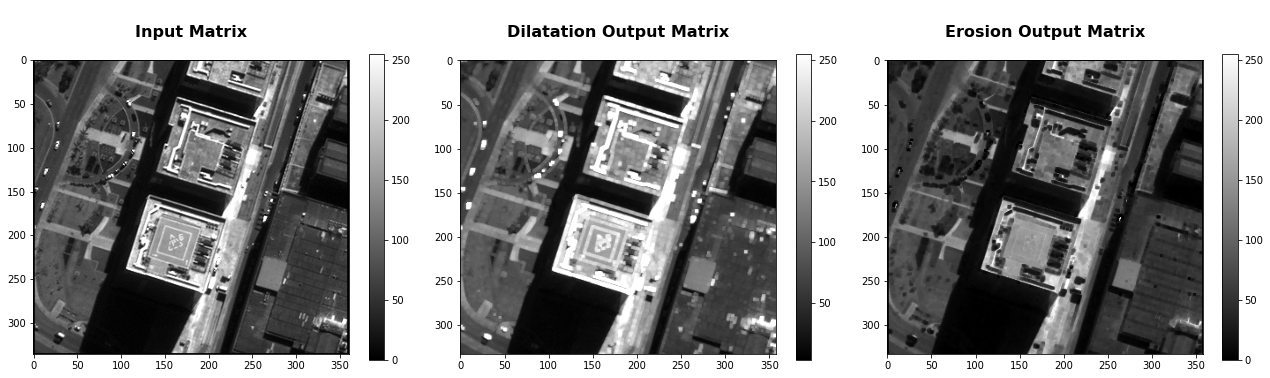

In [79]:
matrix = rasterio_matrix
kernel = np.full((3, 3), 1)
h, w = kernel.shape
kernel = kernel.ravel()
padding = 1
stride = 1

matrix = np.ones((matrix.shape[0] + (padding * 2), matrix.shape[1] + (padding * 2)))
matrix[padding:-padding, padding:-padding] = rasterio_matrix.copy()

## Dilatation
dilatation_output = []
for line in range(0, matrix.shape[0] - h, stride):
    y = []
    for column in range(0, matrix.shape[1] - w, stride):
        submatrix = matrix[line:line + h, column:column + h].ravel().copy()
        aux = submatrix.copy()
        # Binarizing one of the sub-matrices
        aux[aux > 0] = 1
        # Checking if AT LEAST ONE of the binarized sub-array pixels matches 
        # the respective pixel from kernel.
        if (aux == kernel).any():
            # Taking MAXIMUM value from sub-matrix.
            y.append(submatrix.max())
        else:
            y.append(0)
    dilatation_output.append(y)

## Erosion
erosion_output = []
for line in range(0, matrix.shape[0] - h, stride):
    y = []
    for column in range(0, matrix.shape[1] - w, stride):
        submatrix = matrix[line:line + h, column:column + h].ravel().copy()
        aux = submatrix.copy()
        # Binarizing one of the sub-matrices
        aux[aux > 0] = 1
        # Checking if AT ALL the binarized sub-array pixels matches the 
        # respective pixel from kernel.
        if not (False == (aux == kernel)).any():
            y.append(submatrix.min())
        else:
            y.append(0)
    erosion_output.append(y)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

img = axs[0].imshow(matrix, cmap="gray")
axs[0].set_title('\nInput Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(dilatation_output, cmap="gray")
axs[1].set_title('\nDilatation Output Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[1])

img = axs[2].imshow(erosion_output, cmap="gray")
axs[2].set_title('\nErosion Output Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[2])

fig.tight_layout()
plt.show()

### Opencv Dilatation & Erosion

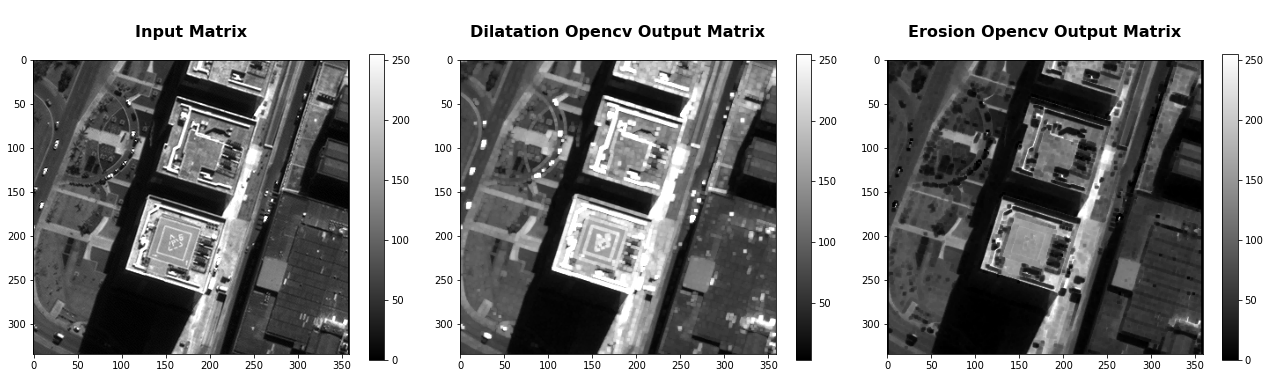

In [80]:
matrix = rasterio_matrix
kernel = np.ones((3, 3), np.uint8)
dilation_matrix_opencv = cv2.dilate(matrix, kernel)
erosion_matrix_opencv = cv2.erode(matrix, kernel)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

img = axs[0].imshow(matrix, cmap="gray")
axs[0].set_title('\nInput Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[0])

img = axs[1].imshow(dilation_matrix_opencv, cmap="gray")
axs[1].set_title('\nDilatation Opencv Output Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[1])

img = axs[2].imshow(erosion_matrix_opencv, cmap="gray")
axs[2].set_title('\nErosion Opencv Output Matrix\n', fontdict={'size': 16, 'weight': 'bold'})
fig.colorbar(img, ax=axs[2])

fig.tight_layout()
plt.show()

# References

[chollet2018] https://livebook.manning.com/book/deep-learning-with-python/chapter-5/56

[gonzalez1996] Gonzalez, Rafael C., and Richard E. Woods. *Digital image processing*. 2002